# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_temp_kelvin = city_weather["main"]["temp_max"]
        city_max_temp = city_temp_kelvin - 273.15
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | itanagar
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | cable beach
City not found. Skipping...
Processing Record 4 of Set 1 | taiohae
City not found. Skipping...
Processing Record 5 of Set 1 | marco island
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | cabedelo
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | al jawf
Processing Record 10 of Set 1 | labrador city
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | ribeira grande
Processing Record 13 of Set 1 | pandan
Processing Record 14 of Set 1 | xiangyang
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | ebon
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | colonia
Processing Record 19 of Set 1 | mount isa
Processing Record 20 of Set 1 | covington
Processing Record 21 of Set 1 | sirte
Proces

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,itanagar,27.1000,93.6167,25.91,89,68,0.74,IN,1696299758
1,waitangi,-43.9535,-176.5597,8.23,93,100,6.71,NZ,1696299758
2,marco island,25.9363,-81.7157,26.00,82,0,2.57,US,1696299758
3,grytviken,-54.2811,-36.5092,1.45,61,97,4.88,GS,1696299700
4,cabedelo,-6.9811,-34.8339,23.37,76,22,4.62,BR,1696299758


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,itanagar,27.1000,93.6167,25.91,89,68,0.74,IN,1696299758
1,waitangi,-43.9535,-176.5597,8.23,93,100,6.71,NZ,1696299758
2,marco island,25.9363,-81.7157,26.00,82,0,2.57,US,1696299758
3,grytviken,-54.2811,-36.5092,1.45,61,97,4.88,GS,1696299700
4,cabedelo,-6.9811,-34.8339,23.37,76,22,4.62,BR,1696299758


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

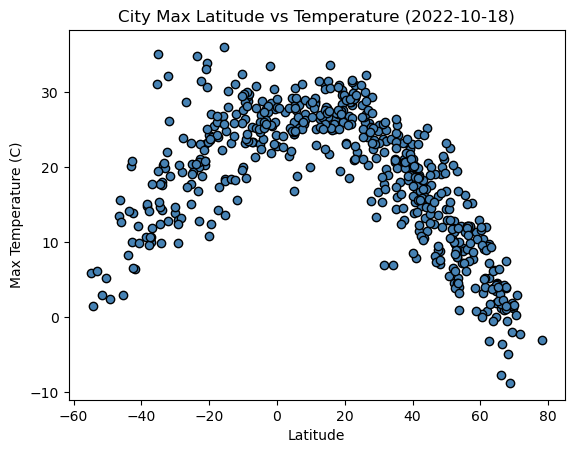

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker='o', color="steelblue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

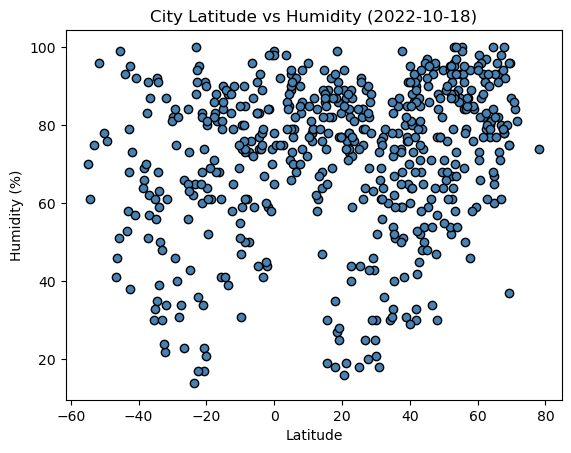

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker='o', color="steelblue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

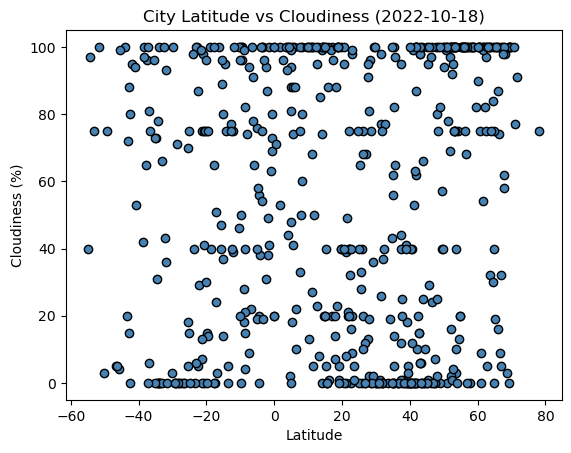

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker='o', color="steelblue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

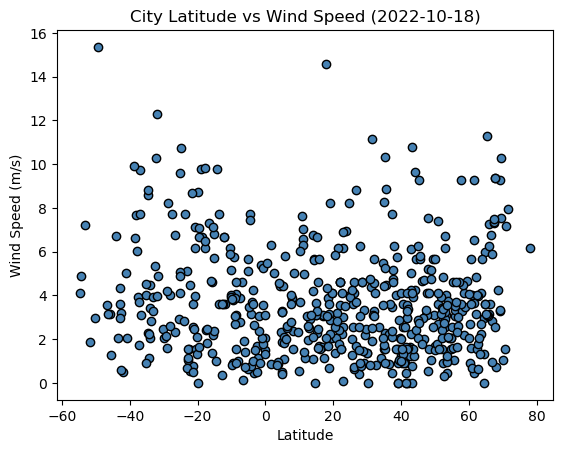

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker='o', color="steelblue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regression_plots(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) 

#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,itanagar,27.1000,93.6167,25.91,89,68,0.74,IN,1696299758
2,marco island,25.9363,-81.7157,26.00,82,0,2.57,US,1696299758
6,al jawf,29.5000,38.7500,23.15,43,100,2.17,SA,1696299759
7,labrador city,52.9463,-66.9114,3.95,100,100,2.57,CA,1696299759
8,bethel,41.3712,-73.4140,16.61,86,0,0.00,US,1696299759


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,waitangi,-43.9535,-176.5597,8.23,93,100,6.71,NZ,1696299758
3,grytviken,-54.2811,-36.5092,1.45,61,97,4.88,GS,1696299700
4,cabedelo,-6.9811,-34.8339,23.37,76,22,4.62,BR,1696299758
5,adamstown,-25.0660,-130.1015,20.42,73,15,9.60,PN,1696299759
12,edinburgh of the seven seas,-37.0676,-12.3116,10.01,57,81,9.74,SH,1696299699


###  Temperature vs. Latitude Linear Regression Plot

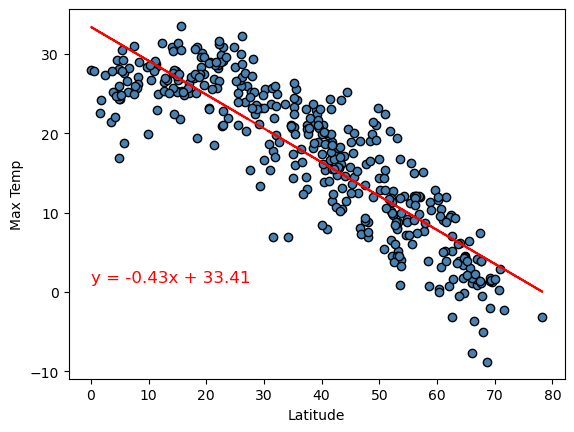

The r-value is: -0.8705128474152466


In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, color='steelblue', alpha=1, edgecolors="black")
plt.plot(x_values, regress_values, color='red')
plt.annotate(line_eq, (min(x_values), min(y_values) + 10), fontsize=12, color='red')

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

print(f"The r-value is: {rvalue}")

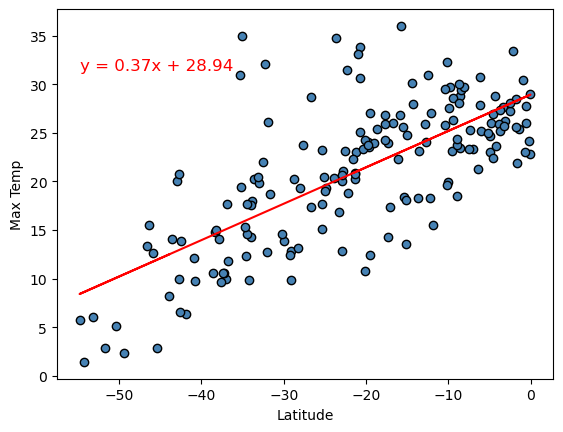

The r-value is: 0.7161059311045932


In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, color='steelblue', edgecolors="black")
plt.plot(x_values, regress_values, color='red')
plt.annotate(line_eq, (min(x_values), min(y_values) + 30), fontsize=12, color='red')

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

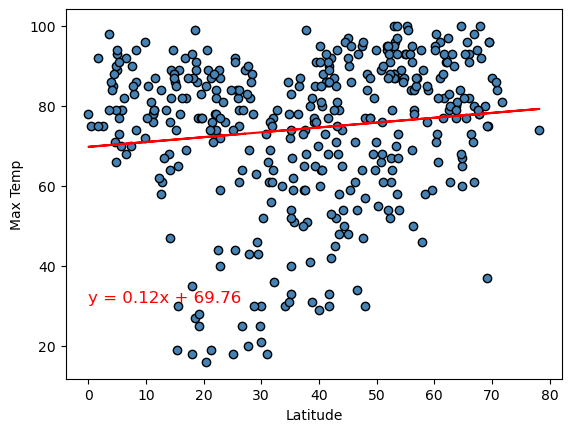

The r-value is: 0.12407700426062715


In [34]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, color='steelblue', edgecolors="black")
plt.plot(x_values, regress_values, color='red')
plt.annotate(line_eq, (min(x_values), min(y_values) + 15), fontsize=12, color='red')

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

print(f"The r-value is: {rvalue}")

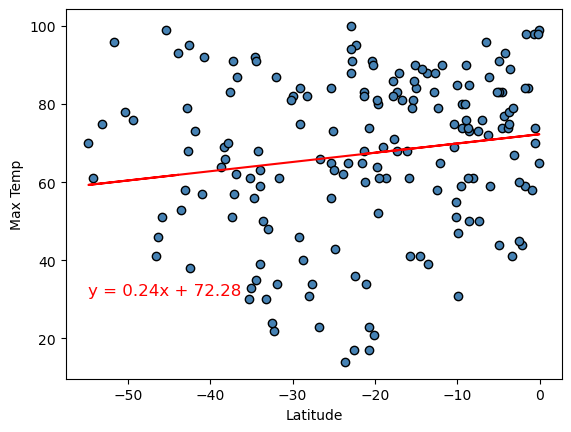

The r-value is: 0.1626647452400004


In [36]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, color='steelblue', edgecolors="black")
plt.plot(x_values, regress_values, color='red')
plt.annotate(line_eq, (min(x_values), min(y_values) + 17), fontsize=12, color='red')

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

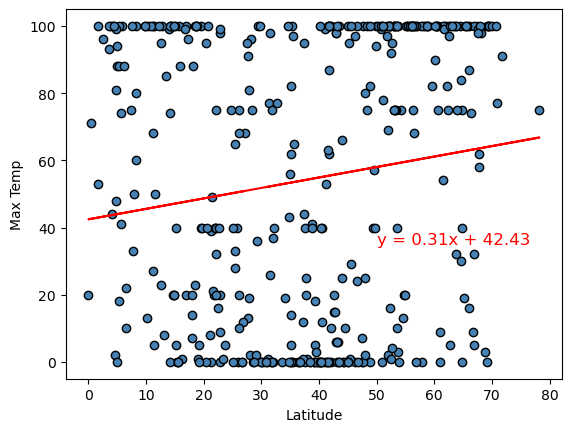

The r-value is: 0.14316532249908892


In [38]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, color='steelblue', edgecolors="black")
plt.plot(x_values, regress_values, color='red')
plt.annotate(line_eq, (min(x_values)+ 50, min(y_values) + 35), fontsize=12, color='red')

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

print(f"The r-value is: {rvalue}")

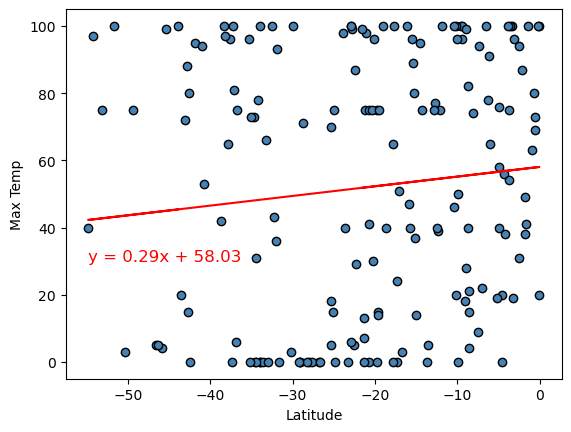

The r-value is: 0.1060324456226365


In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, color='steelblue', edgecolors="black")
plt.plot(x_values, regress_values, color='red')
plt.annotate(line_eq, (min(x_values), min(y_values) + 30), fontsize=12, color='red')

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

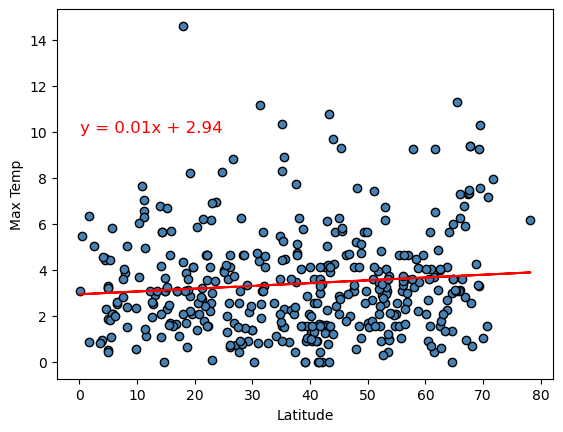

The r-value is: 0.10168547068680599


In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, color='steelblue', edgecolors="black")
plt.plot(x_values, regress_values, color='red')
plt.annotate(line_eq, (min(x_values), min(y_values) + 10), fontsize=12, color='red')

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

print(f"The r-value is: {rvalue}")

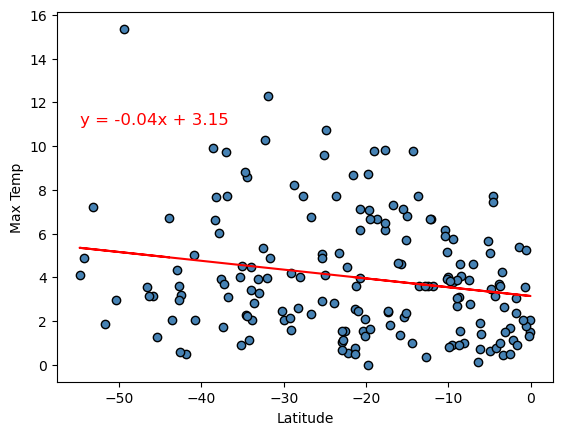

The r-value is: -0.20568652678291977


In [43]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, color='steelblue', edgecolors="black")
plt.plot(x_values, regress_values, color='red')
plt.annotate(line_eq, (min(x_values), min(y_values) + 11), fontsize=12, color='red')

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE